In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from datascience import *

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# K-means and NBA data

In [6]:
# read in `data/nba2013.csv`
nba = Table.read_table('data/nba2013.csv')
nba

### Understanding the data

Keep only numeric columns and plot scatterplots and histograms

In [14]:
# drop name/position; convert to dataframe for plotting
numeric_df = nba.drop(['Name', 'Position']).to_df()

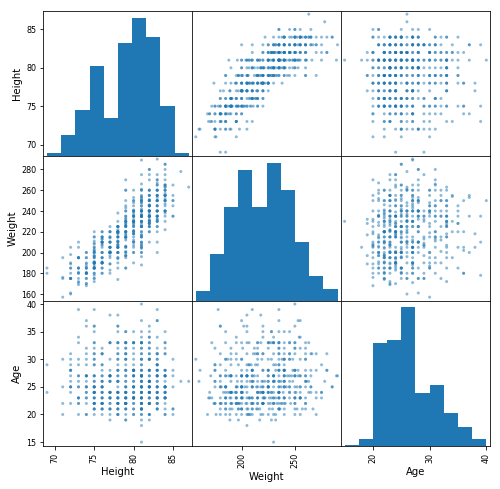

In [15]:
pd.plotting.scatter_matrix(numeric_df, figsize=(8,8));

### The position column
* Categorical
* How do the above plots change by position?

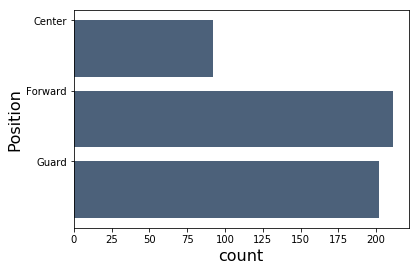

In [21]:
nba.group('Position').barh('Position', 'count');

/Users/afraenkel/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


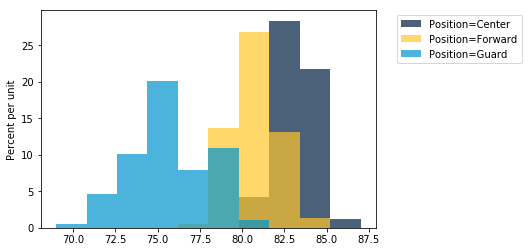

In [24]:
nba.hist('Height', group='Position');

/Users/afraenkel/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


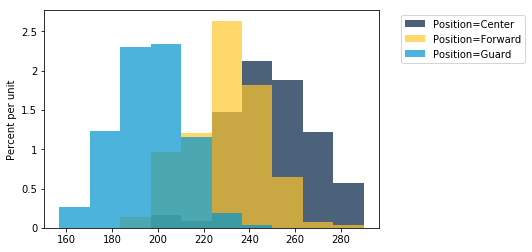

In [25]:
nba.hist('Weight', group='Position');

### Encode position as an integer

In [27]:
def position2int(s):
    '''encode position to integers, preserving order'''
    if s == 'Guard':
        return 0
    elif s == 'Forward':
        return 1
    elif s == 'Center':
        return 2
    else:
        raise Exception

In [28]:
nba = nba.with_column('Position', nba.apply(position2int, 'Position'))
nba

Name,Position,Height,Weight,Age
DeQuan Jones,0,80,221,23
Darius Miller,0,80,235,23
Trevor Ariza,0,80,210,28
James Jones,0,80,215,32
Wesley Johnson,0,79,215,26
Klay Thompson,0,79,205,23
Thabo Sefolosha,0,79,215,29
Chase Budinger,0,79,218,25
Kevin Martin,0,79,185,30
Evan Fournier,0,79,206,20


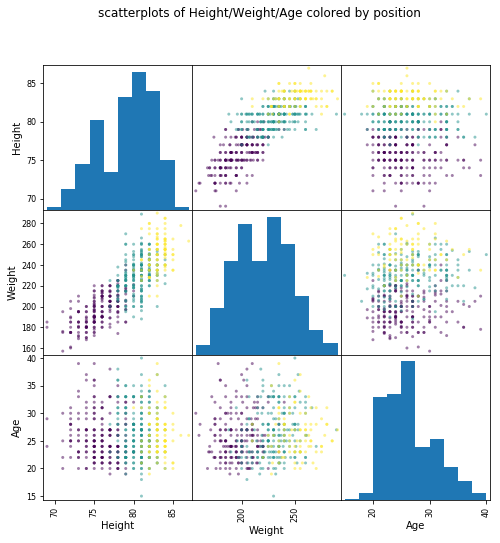

In [35]:
pd.plotting.scatter_matrix(numeric_df, figsize=(8,8), c=nba.column('Position'))
plt.suptitle('scatterplots of Height/Weight/Age colored by position');

### Initial clustering attempt
* Let's run k-means and see if the 'natural' clustering by Height/Weight/Age looks like the players positions.
* K-means knows nothing about the players positions! If they coincide, it's only because different positions have different Height/Weight/Age profiles!

In [43]:
kmeans = KMeans(n_clusters=3)

In [62]:
# pandas dataframe for plotting
num_data = nba.select('Height', 'Weight', 'Age').to_df()

In [63]:
# t.values converts the pandas dataframe to a numpy ndarray for sklearn!
kmeans.fit(num_data.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

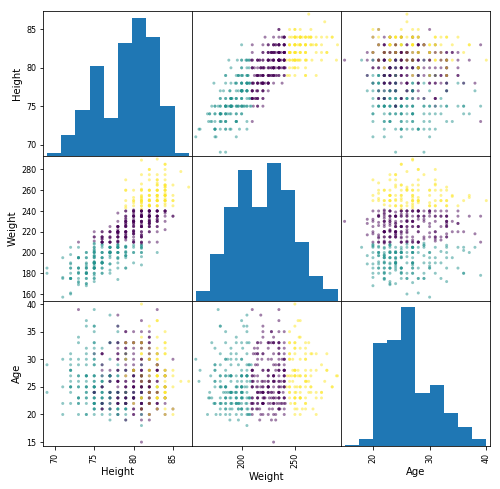

In [64]:
labels = kmeans.predict(num_data.values)
pd.plotting.scatter_matrix(num_data, figsize=(8,8), c=labels);

Look at the cluster centers:

In [65]:
kmeans.cluster_centers_

array([[ 80.06422018, 226.07798165,  26.26146789],
       [ 75.75842697, 191.6741573 ,  25.6011236 ],
       [ 82.46788991, 257.22018349,  27.00917431]])

### Questions:
* How closely do the clusters match up with the positions?
    - Ok... but, not great!
* When evaluating the clusters, look at weight vs. age. 
    - Is weight determining the cluster structure too much?

### Next steps:
* K-means clusters based on distance; distances depend on the units of each dimension.
* Dimensions with larger numbers will have larger influence on the clustering!
* Scale each dimension to more comparable units:
    - `MinMaxScaler` will scale a column linearly so the minimum value is 0 and the maximum value is 1.
    - `StandardScalar` z-scales a column into standard units (how many deviations from the mean of a column that a data point sits).

In [68]:
mm = MinMaxScaler()
mm.fit(num_data.values)
mm_transformed = mm.transform(num_data.values)

/Users/afraenkel/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Compare the plot below with the plots above! (units!)

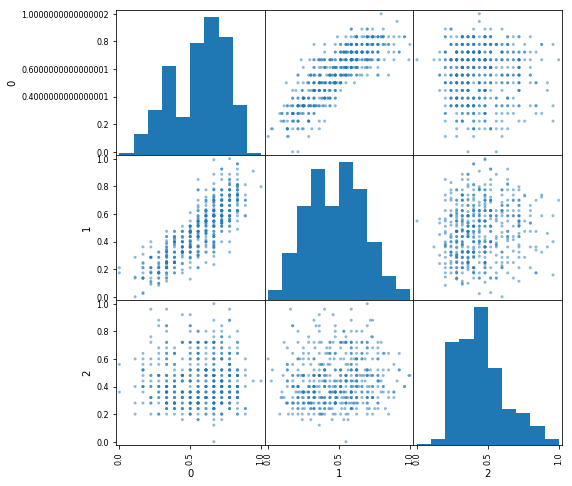

In [70]:
pd.plotting.scatter_matrix(pd.DataFrame(mm_transformed), figsize=(8,8));

Try the same thing with `StandardScaler`!

In [ ]:
# code here

In [ ]:
# code here

Use the scaled data to cluster using k-means. Do you see a difference?

In [ ]:
# code here

In [ ]:
# code here

In [ ]:
# code here

# Another NBA dataset

This dataset contains player statistics for the 2016 NBA season. Try k-means clustering on *subsets* of the columns in the dataset. Start with trying to answer the same questions as above. If you'd like, see if you can interpret the clusters when you increase the number of clusters.

**Warning**: Don't use scatter_matrix with more than ~5 columns -- it requires a lot of memory to plot.

The columns of this dataset are:

```
Rk        Player-id
Player    Player Name
Pos       Position
Age       Player Age
Tm        Team
G         Number of Games played
GS        Number of Games started
MP        Minutes played
FG        Field Goals
FGA       Field Goals Attempted
3P        Three-point shots made
3PA       Three-point shots attempted
2P        Two-point shots made
2PA       Two-point shots attempted
FT        Free Throws made
FTA       Free Throws attempted
ORB       Offensive rebounds
DRB       Defensive rebounds
TRB       Total rebounds
AST       Number of assists
STL       Number of steals
BLK       Number of blocks
TOV       Number of turnovers
PF        Number of personal fouls
PTS       Total number of points
```

In [73]:
nba = Table.read_table('data/nba2016.csv')
nba

In [ ]:
# Code

In [ ]:
# Code

In [ ]:
# Code

### Questions and Comments for next steps
* Do clusters merely reflect minutes played through the season?
    - Normalize each column by minutes played?
    - Create other variables (e.g. shooting percentages)
* Players show up twice in the table if they were traded
    - Clean the data
* Include position in the clustering and see what you get!

In [ ]:
# Code